In [472]:
# Data analysis libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  #helps to normalizes data between zero an one

# Classifiers libraries i.e machine learning algorithms
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import xgboost

from xgboost import XGBClassifier


In [473]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [474]:
df = pd.read_csv(r"C:\Users\HP ELITEBOOK 1040\Desktop\DATA ANALYSIS\heart disease data.csv")

In [475]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [476]:
# rename headers for proper understanding

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina',
             'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_sugar      303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [478]:
#overall statistical analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [479]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_sugar        0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

## Exploratory Data Analysis

### Univariate Data Analysis

<AxesSubplot:xlabel='thalassemia'>

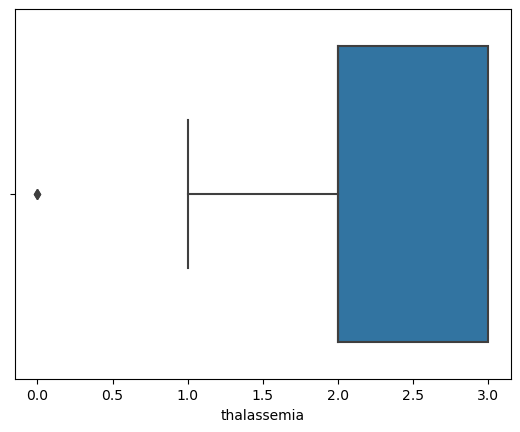

In [480]:
# checking for outliers in thallassemia

sns.boxplot(x=df['thalassemia'])

<AxesSubplot:xlabel='thalassemia'>

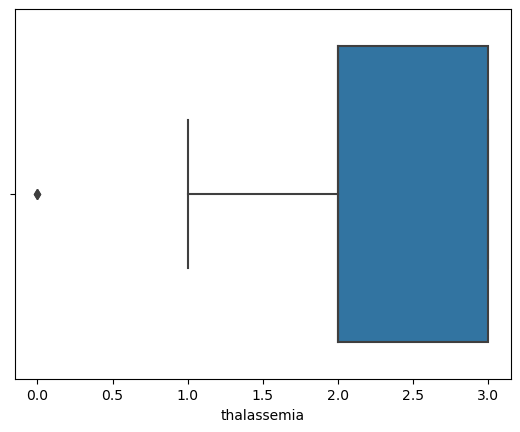

In [481]:
# checking for outliers in thallassemia

sns.boxplot(x=df['thalassemia'])

<AxesSubplot:xlabel='cholesterol'>

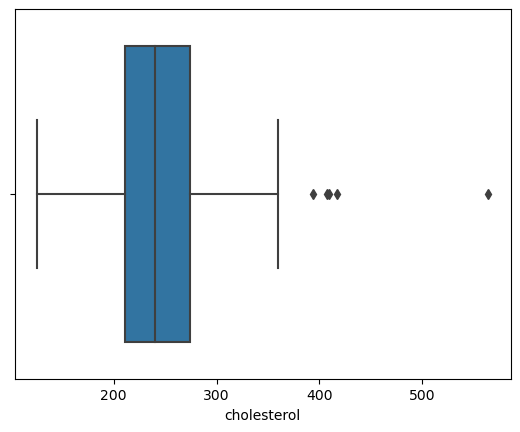

In [482]:
# checking for outliers in cholesterol

sns.boxplot(x=df['cholesterol'])

<AxesSubplot:xlabel='resting_blood_sugar'>

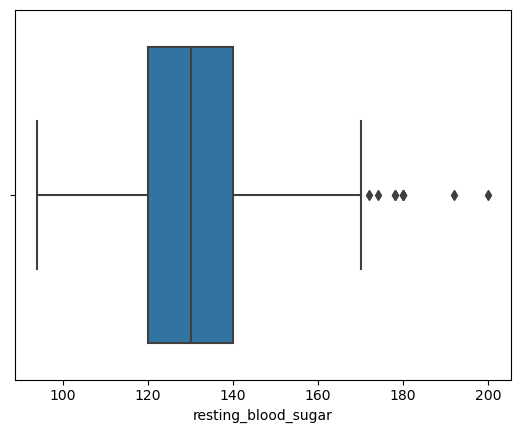

In [483]:
# checking for outliers in resting blood sugar

sns.boxplot(x=df['resting_blood_sugar'])

<AxesSubplot:xlabel='max_heart_rate_achieved'>

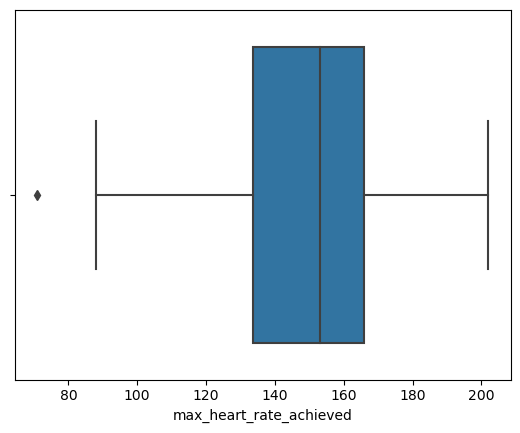

In [484]:
# checking for outliers in max_heart_rate_achieved

sns.boxplot(x=df['max_heart_rate_achieved'])

Text(0.5, 1.0, 'Total Number of Patients By Age')

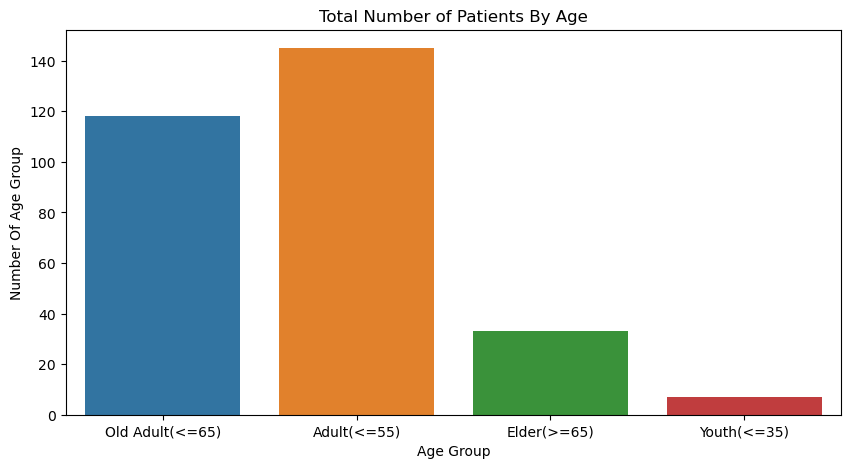

In [485]:
# age categorization

def age_bracket(age): # the 'def' helps me to make the 'age bracket' a function such that it can be called by the body in indentation
    if age <=35:
        return "Youth(<=35)"
    elif age <=55:
        return "Adult(<=55)"
    elif age <=65:
        return "Old Adult(<=65)"
    else:
        return "Elder(>=65)"

df['age_bracket'] =df['age'].apply(age_bracket) # applying the function 'age_bracket' ensure that what the value of 'age' equalizes what it is said to be in the indentation of the function created.

#investigating the age group
plt.figure(figsize = (10,5)) # specifying the size of the chart
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group') # naming the x-axis
plt.ylabel('Number Of Age Group') # naming the y-axis
plt.title('Total Number of Patients By Age') #naming the chat

#### Analysis

From the above chart, the patients within the bracket old and adult are highly represented than other age brackets.

Text(0.5, 1.0, 'Histogram Chart For Age')

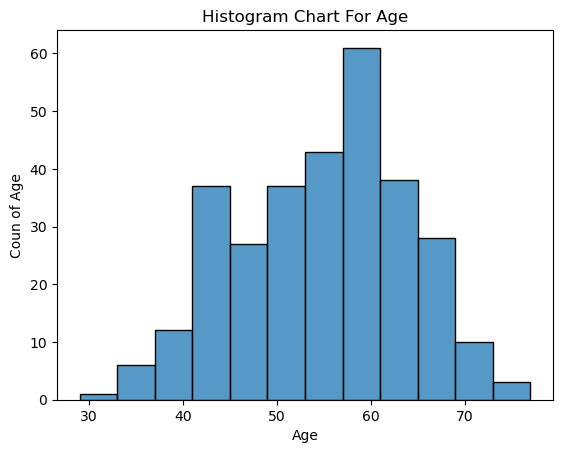

In [486]:
sns.histplot(x='age', data = df)
plt.xlabel('Age')
plt.ylabel('Coun of Age')
plt.title('Histogram Chart For Age')

In [487]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket'],
      dtype='object')

Text(0.5, 1.0, 'Count Plot Of Gender')

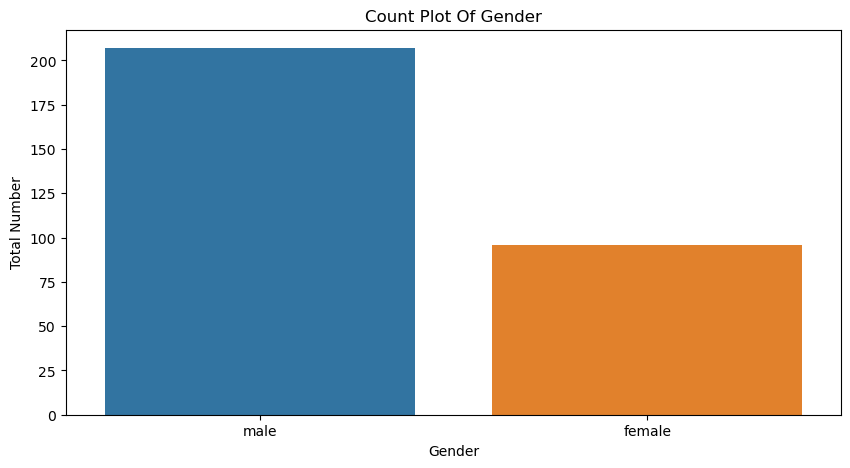

In [488]:
# explaining the sex column
def gender(sex):
    if sex == 1:
        return 'male'
    else:
        return 'female'
    
gender(1)

df['gender']=df['sex'].apply(gender)

# investigating the gender volumn
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data = df)
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.title('Count Plot Of Gender')

#### Analysis

The data consists of more male patients than female

In [489]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender'],
      dtype='object')

Text(0.5, 1.0, 'Chart Showing Chest Pain Type')

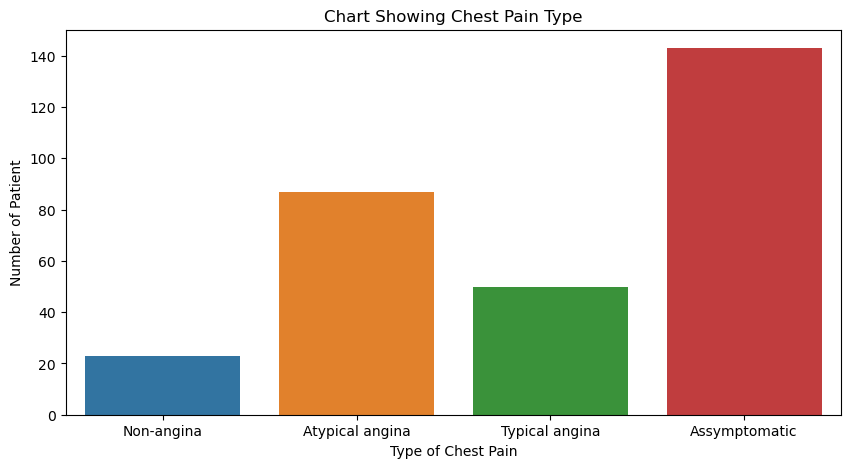

In [490]:
#categorizing the chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal, 4:assymptomatic)

def chest_pain(cp):
    if cp == 1:
        return 'Typical angina'
    elif cp == 2:
        return 'Atypical angina'
    elif cp == 3:
        return 'Non-angina'
    else:
        return 'Assymptomatic'

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

# visualize cp_cat
plt.figure(figsize =(10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Type of Chest Pain')
plt.ylabel('Number of Patient')
plt.title('Chart Showing Chest Pain Type')

Positive    165
Negative    138
Name: targ, dtype: int64


<AxesSubplot:title={'center':'Chart Showing The Number Of Patients Positive Or Negative'}, xlabel='targ', ylabel='count'>

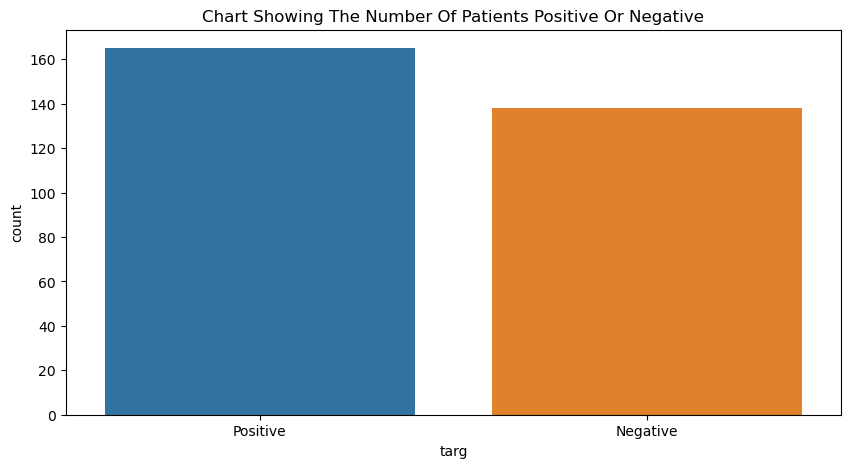

In [491]:
# categorizing data

def targ(t):
    if t == 1:
        return 'Positive'
    else:
        return 'Negative'

df['targ'] = df['target'].apply(targ)

print(df['targ'].value_counts())
# visualizing targ
plt.figure(figsize = (10, 5))
plt.title('Chart Showing The Number Of Patients Positive Or Negative')
sns.countplot(x='targ', data=df)

#### Analysis

Majrity of the patients are tested positive

### Bivariate Analysis

In [492]:
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,targ
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),male,Non-angina,Positive
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),male,Atypical angina,Positive
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),female,Typical angina,Positive
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),male,Typical angina,Positive
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),female,Assymptomatic,Positive


Text(0, 0.5, 'Number of Patients')

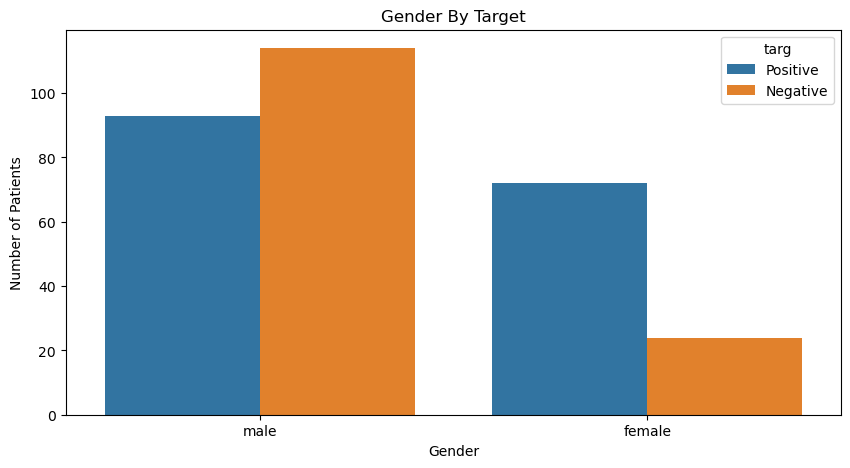

In [493]:
# Investigating the each sex by target
plt.figure(figsize=(10, 5))
plt.title('Gender By Target')
sns.countplot(hue='targ',x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Number of Patients')

### Insights

There are higher number of registered females with heart disease compared to males, who has more percentage with no heart disease.

Text(0, 0.5, 'Nuber of Patients')

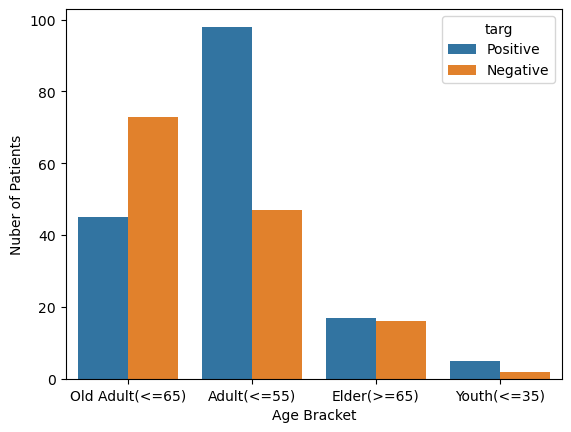

In [494]:
# investigating age_bracket by target

sns.countplot(x='age_bracket', data=df, hue='targ')
plt.xlabel('Age Bracket')
plt.ylabel('Nuber of Patients')

### Insights

The patients within the age bracket 'Adult' are more likely to have heart disease compared to the othe registered patients.

In [495]:
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,targ
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),male,Non-angina,Positive
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),male,Atypical angina,Positive
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),female,Typical angina,Positive
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),male,Typical angina,Positive
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),female,Assymptomatic,Positive


Text(0, 0.5, 'Number of Ptients')

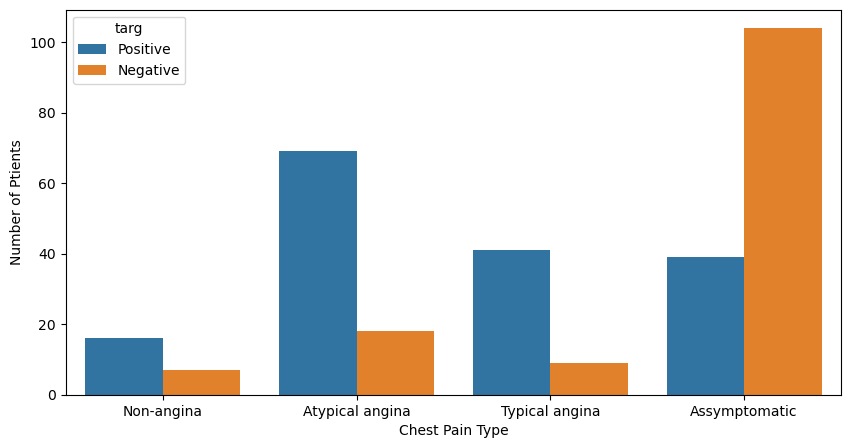

In [496]:
# investicating the chest pain type category

plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df, hue='targ')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Ptients')

#### Insight

Majority of patients that complained of atypical anginal type of chest pain are likely to have heart disease, but most of those with the assymptomatic chest pain type are less likely not have have heart disease.

### Multivariate Analysis

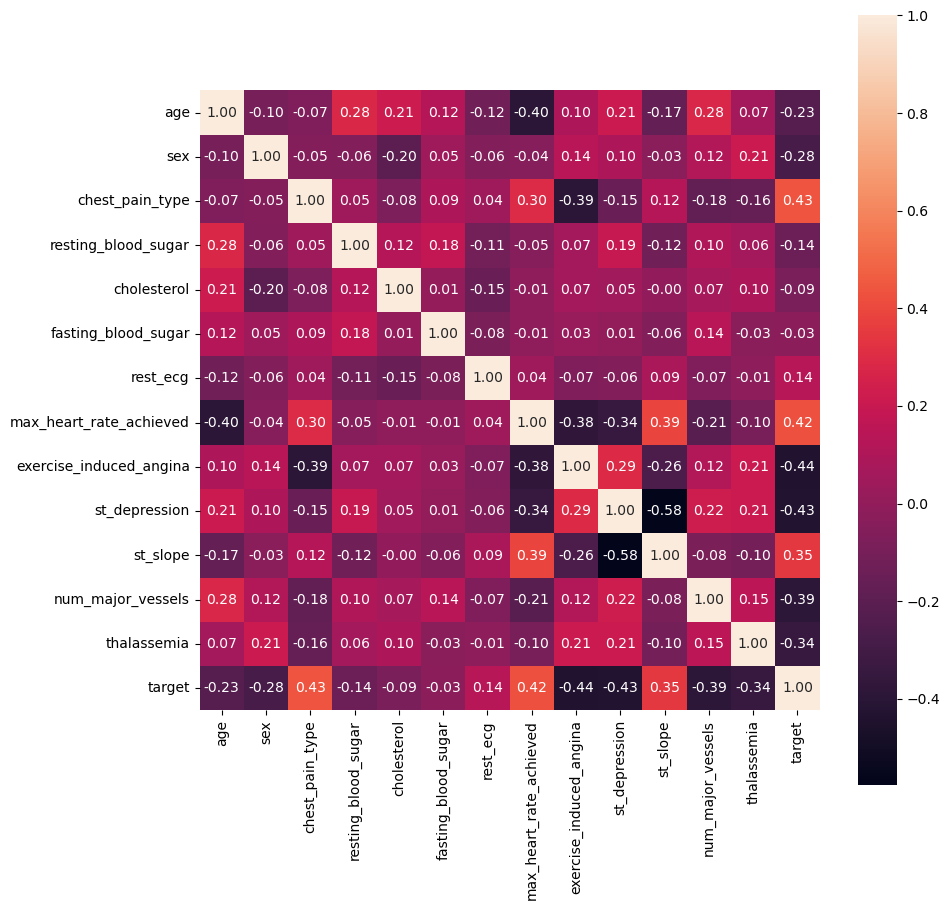

In [497]:
# the correlation matrix
plt.figure(figsize = (10,10))
hm = sns.heatmap (df.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

# annot: is to show the numbers in the boxes
# annot_kws=is to specify the size of the numbers
# fmt= is to specify the number of places the decimal should be


# Data Pre-processing / Feature Engineering

In [498]:
df.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,targ
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),male,Non-angina,Positive
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),male,Atypical angina,Positive
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),female,Typical angina,Positive
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),male,Typical angina,Positive
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),female,Assymptomatic,Positive


In [499]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'targ'],
      dtype='object')

In [500]:
# creating a new data frame that will not contain our proposed prediction labels and also the new columns created
# the new columns created was basically for exploring the data

df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia']]

label = df[['target']] # label is the proposed prediction separated from the entire dataframe

In [501]:
df1.head()

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [502]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [503]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_sugar          int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [504]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_sugar      303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [505]:
df1.columns


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_sugar', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia'],
      dtype='object')

## Machine Learning

In [506]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [507]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      242 non-null    int64  
 1   sex                      242 non-null    int64  
 2   chest_pain_type          242 non-null    int64  
 3   resting_blood_sugar      242 non-null    int64  
 4   cholesterol              242 non-null    int64  
 5   fasting_blood_sugar      242 non-null    int64  
 6   rest_ecg                 242 non-null    int64  
 7   max_heart_rate_achieved  242 non-null    int64  
 8   exercise_induced_angina  242 non-null    int64  
 9   st_depression            242 non-null    float64
 10  st_slope                 242 non-null    int64  
 11  num_major_vessels        242 non-null    int64  
 12  thalassemia              242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


In [508]:
y_train

,target
132,1
202,0
196,0
75,1
176,0
...,...
188,0
71,1
106,1
270,0


In [509]:
X_test

,age,sex,chest_pain_type,resting_blood_sugar,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [510]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


In [511]:
# Model building

# Logistic Regression

logreg = LogisticRegression() #logreg is a variable name assigned to LogisticRegression(), it can be anything

logreg.fit(X_train, y_train)  # this is basically machine learning

ly_pred = logreg.predict(X_test) # machine testing

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test, ly_pred))
print('Precision:', precision_score(y_test, ly_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, ly_pred))
print('AUC-ROC:', roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8852459016393442
Precision: 0.8787878787878788
Recall: 0.90625
F1-score: 0.8923076923076922
AUC-ROC: 0.8841594827586207


- Accuracy: 0.8852459016393442 means that the proportion of correctly classified instances out of all instances is around 88.5%.
- Precision: 0.8787878787878788 means that out of all instances that were predicted as positive by the model, around 87.9% of them were actually positive.
- Recall: 0.90625 means that out of all actual positive instances, around 90.6% of them were correctly identified by the model.
- F1-score: 0.8923076923076922 is the harmonic mean of precision and recall, which provides a balanced measure of both metrics.
- AUC-ROC: 0.8841594827586207 is the area under the receiver operating characteristic (ROC) curve, which is a measure of the model's ability to distinguish between positive and negative instances. An AUC-ROC value of 1 indicates perfect performance, while a value of 0.5 indicates random performance.

Overall, these metrics suggest that the logistic regression model has good performance, with high accuracy, precision, recall, and F1-score, and a reasonably high AUC-ROC value. However, it's important to keep in mind that the performance of a model can vary depending on the specific dataset and task, and it's always a good idea to evaluate the model on multiple metrics and compare it with other models to ensure that it's the best fit for the task at hand.

In [512]:
ly_pred # this is the prediction  of the machine learning from the X_test

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

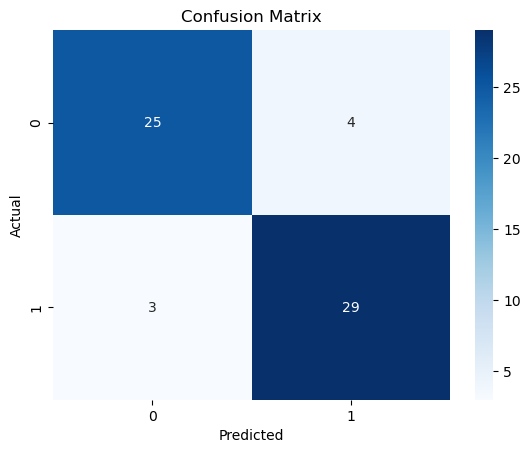

In [513]:
# Confusion Matrix For Logistic Regression

lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

** The confusion matrix of the logistic regression predicted that 25 were positive and 29 were negative, which was correctly predicted, but it wrongly predicted that 4 persons were with heart and 3 patients are without heart disease.

In [514]:
# Random forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rfy_pred))
print('Precision:', precision_score(y_test, rfy_pred))
print('Recall:', recall_score(y_test, ly_pred))
print('F1-score:', f1_score(y_test, rfy_pred))
print('AUC-ROC:', roc_auc_score(y_test, rfy_pred))

Random Forest Classifier
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.90625
F1-score: 0.8253968253968254
AUC-ROC: 0.8200431034482759


1. Accuracy: It is the proportion of correctly predicted instances out of total instances. In your case, the Random Forest Classifier has an accuracy of 0.819, which means it correctly classified 81.9% of instances.

2. Precision: It is the proportion of true positives out of total predicted positives. In your case, the Random Forest Classifier has a precision of 0.838, which means it correctly predicted 83.8% of the positive instances out of all the instances it predicted as positive.

3. Recall: It is the proportion of true positives out of total actual positives. In your case, the Random Forest Classifier has a recall of 0.906, which means it correctly identified 90.6% of the positive instances out of all the actual positive instances.

4. F1-score: It is the harmonic mean of precision and recall. In your case, the Random Forest Classifier has an F1-score of 0.825, which is the weighted average of precision and recall.

5. AUC-ROC: It is the area under the receiver operating characteristic (ROC) curve, which is a plot between the true positive rate and the false positive rate. In your case, the Random Forest Classifier has an AUC-ROC of 0.820, which means it has a moderate predictive power.

<function matplotlib.pyplot.show(close=None, block=None)>

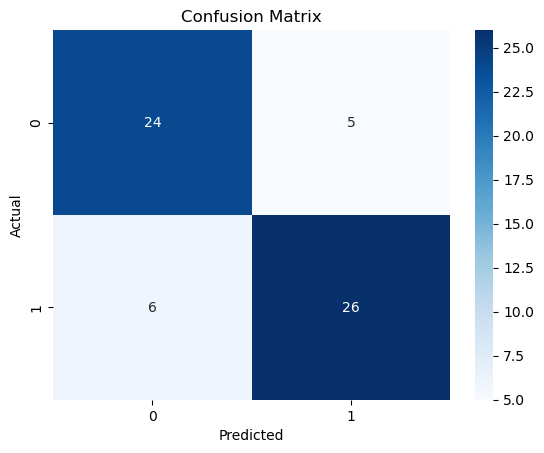

In [515]:
# Confusion Matrix for Random Forest Classifier

rcm = confusion_matrix(y_test, rfy_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

** The above matrix explained that the model predicted correctly 24 of those that are positive and correctly 26 of those that are negative. But it wrongly predicted that 5 were positive and 6 were negative.

### Normalization

In [516]:
# minmaxscaler ensures all the variables falls between 0 and 1
# it is used to check and normalize outliers

scaler = MinMaxScaler()

df1['Scaled_RBP'] = scaler.fit_transform(df1['resting_blood_sugar'].values.reshape(-1,1))
df1['Scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['Scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['Scaled_max_heart_rate'] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_sugar', 'cholesterol', 'max_heart_rate_achieved', 'thalassemia'], axis=1, inplace=True) # this helps to remove the colums of the highlighted feature.

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


In [517]:
#  applying 8 different machine learning models to the dataset

classifiers = [[XGBClassifier(), 'XGB Classifier'],
              [RandomForestClassifier(), 'Random Forest'],
              [KNeighborsClassifier(), 'K-Nearest Neighbors'],
              [SGDClassifier(), 'SGD Classifier'],
              [SVC(), 'SVC'],
              [GaussianNB(), 'Naive Bayes'],
              [DecisionTreeClassifier(random_state=42), 'Decision tree'],
              [LogisticRegression(), 'Logistic Regression']]

In [518]:
acc_list={}
precision_list={}
recall_list={}
roc_list={}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name=classifier[1]
    
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    
    if model_name != classifiers[-1][1]:
        print('')

In [525]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['86.89%'],
 'K-Nearest Neighbors': ['68.85%'],
 'SGD Classifier': ['55.74%'],
 'SVC': ['70.49%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['75.41%'],
 'Logistic Regression': ['88.52%']}

In [520]:
print('Accuracy Score')
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,86.89%,68.85%,55.74%,70.49%,86.89%,75.41%,88.52%


In [521]:
print('Precision')
s2 = pd.DataFrame(precision_list)
s2

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,85.29%,68.57%,54.39%,66.67%,90.0%,84.0%,87.88%


In [522]:
print('Recall')
s3 = pd.DataFrame(recall_list)
s3

Recall


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,78.12%,90.62%,75.0%,96.88%,87.5%,84.38%,65.62%,90.62%


In [523]:
print('ROC Score')
s4 = pd.DataFrame(roc_list)
s4

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,86.69%,68.53%,53.61%,69.61%,87.02%,75.92%,88.42%
